In [35]:
%matplotlib inline
import importlib as imp
import matplotlib.pylab as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set_style('ticks');
current_colors = sns.color_palette()
sns.set_palette('Accent');

# Adjust all text and axes colors to black. default is some studip gray that appears to faint when printed 
from matplotlib import rc , rcParams
rc('axes',edgecolor='black')
rc('xtick',color='black',labelsize=15)
rc('ytick',color='black',labelsize=15)
rc('text',color='black')
rc('axes',labelcolor='black',linewidth=2.0)
rc('font',size=15)
#rcParams["patch.force_edgecolor"] = True

import Calculate_ABA_Finkelsteinlab_Diewertje as CalcABA
imp.reload(CalcABA);
import plotting_ABA_Diewertje as pltABA
imp.reload(pltABA);
import plotting_Boyle_Diewertje as plt_B
imp.reload(plt_B);

import sys 
sys.path.append('../code_general/')
import CRISPR_free_energy_landscape_Diewertje as FreeEnergy
imp.reload(FreeEnergy);
import read_model_ID;
imp.reload(read_model_ID);

import sys 
sys.path.append('../code_general_Finkelsteinlab/')
import plotting_Finkelsteinlab as plt_F
imp.reload(plt_F)


import analysis_SA_fits_Diewertje as SAfits
imp.reload(SAfits);



In [36]:
simset3 = []
no_good = []
# Used concentrations: [10,100]
chi_squared = [] 

#---------- collect simulations ---------------
for sim in range(1,25):
    sa = pd.read_csv('../Diewertje/2_5_2019_var_rates_conc3/fit_2_5_2019_var_rates_conc3_sim_' +str(sim)+'.txt', delimiter='\t', index_col=45)
    filename = '../Diewertje/2_5_2019_var_rates_conc3/fit_2_5_2019_var_rates_conc3_sim_' +str(sim) +'.txt'   
    chi_squared.append(sa.Potential.iloc[-1])
    simset3.append(filename)
        
    
best_fit_conc3 = simset3[np.argmin(chi_squared)]
best_fit_conc3

'../Diewertje/2_5_2019_var_rates_conc3/fit_2_5_2019_var_rates_conc3_sim_10.txt'

In [5]:
print('The chi-squared of the best fit is:',chi_squared[0])
print('The chi-squared of WA is: ', chi_squared_WA)

The chi-squared of the best fit is: 66822.59581679999


NameError: name 'chi_squared_WA' is not defined

In [37]:
# Load data
import Prepare_data_Simple as Pre
rawABA=pd.read_csv('../Data_ABA_Finkelsteinlab/TargetE-dCas9_AbsoluteABA_Canonical_OT-r_0-2.csv')
rawABA

# prepare data
import Prepare_data_Simple as pre
xdata,ydata,yerr=pre.Prepare_Cdata('../Data_ABA_Finkelsteinlab/','TargetE-dCas9_AbsoluteABA_Canonical_OT-r_0-2.csv')


In [7]:
rawABA

,sequence,ABA,error,On Target,PAM,Canonical,Length difference,Alignment,Alignment (All),Mutation ID,Mutation Type,Mutation Count,Mutation Positions
0,AAAAGACGCATAAAGATGAGACGCTGG,2.451314,0.120136,True,TGG,True,0,CGCAGAGTAGAAATACGCAG\r\n||||||||||||||||||||\r...,CGCAGAGTAGAAATACGCAG\r\n||||||||||||||||||||\r...,OT,OT,0.0,NaN
1,AAATCACGCATAAAGATGAGACGCTGG,2.465621,0.050944,False,TGG,True,0,CGCAGAGTAGAAATACGCAG\r\n|||||||||||||||||||.\r...,CGCAGAGTAGAAATACGCAG-\r\n||||||||||||||||||| ...,r:20:C,r,1.0,20
2,AAATCTCGCATAAAGATGAGACGCTGG,2.660628,0.060161,False,TGG,True,0,CGCAGAGTAGAAATACGCAG\r\n||||||||||||||||||..\r...,CGCAGAGTAGAAATACGCAG--\r\n|||||||||||||||||| ...,r:19:T|r:20:C,r,2.0,19|20
3,AAATGACGCATAAAGATGAGACGCTGG,2.531423,0.061229,True,TGG,True,0,CGCAGAGTAGAAATACGCAG\r\n||||||||||||||||||||\r...,CGCAGAGTAGAAATACGCAG\r\n||||||||||||||||||||\r...,OT,OT,0.0,NaN
4,AATAGACGCATAAAGATGAGACGCTGG,2.626618,0.052173,True,TGG,True,0,CGCAGAGTAGAAATACGCAG\r\n||||||||||||||||||||\r...,CGCAGAGTAGAAATACGCAG\r\n||||||||||||||||||||\r...,OT,OT,0.0,NaN
5,ACTAGACGCATAAAGATGAGACGCTGG,2.780461,0.036286,True,TGG,True,0,CGCAGAGTAGAAATACGCAG\r\n||||||||||||||||||||\r...,CGCAGAGTAGAAATACGCAG\r\n||||||||||||||||||||\r...,OT,OT,0.0,NaN
6,AGTAGACGCATAAAGATGAGACGCTGG,2.640303,0.041959,True,TGG,True,0,CGCAGAGTAGAAATACGCAG\r\n||||||||||||||||||||\r...,CGCAGAGTAGAAATACGCAG\r\n||||||||||||||||||||\r...,OT,OT,0.0,NaN
7,ATAAGACGCATAAAGATGAGACGCTGG,2.612687,0.066341,True,TGG,True,0,CGCAGAGTAGAAATACGCAG\r\n||||||||||||||||||||\r...,CGCAGAGTAGAAATACGCAG\r\n||||||||||||||||||||\r...,OT,OT,0.0,NaN
8,ATCAGACGCATAAAGATGAGACGCTGG,2.683235,0.047547,True,TGG,True,0,CGCAGAGTAGAAATACGCAG\r\n||||||||||||||||||||\r...,CGCAGAGTAGAAATACGCAG\r\n||||||||||||||||||||\r...,OT,OT,0.0,NaN
9,ATGAGACGCATAAAGATGAGACGCTGG,2.668154,0.040950,True,TGG,True,0,CGCAGAGTAGAAATACGCAG\r\n||||||||||||||||||||\r...,CGCAGAGTAGAAATACGCAG\r\n||||||||||||||||||||\r...,OT,OT,0.0,NaN


The min amount of measurments is:  9
The max amount of measurments is:  51


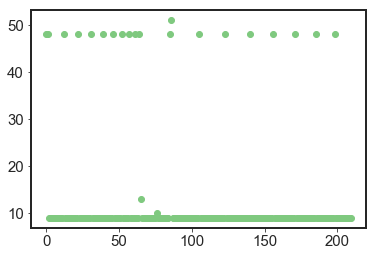

In [93]:
# to see if we have the same amount of measurements per position
measurements=[]
for i in range(len(ydata)):
    measurements.append(len(ydata[i]))
plt.scatter(range(len(ydata)),measurements)
print('The min amount of measurments is: ',min(measurements))
print('The max amount of measurments is: ',max(measurements))

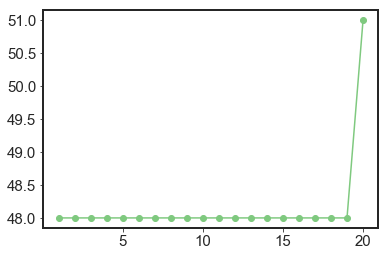

In [6]:
PosSingle=[]
MeasSingle=[]
for i in range(len(xdata)):
    if (len(xdata[i])==1):
        PosSingle.append(xdata[i])
        MeasSingle.append(len(ydata[i]))
MeasSingle_ordered=np.empty(len(PosSingle)+1)
for i in range(1,len(MeasSingle)+1):
    MeasSingle_ordered[PosSingle[i-1]]=MeasSingle[i-1]
plt.plot(range(1,21),np.array(MeasSingle_ordered[1:]),marker='o')

In [38]:
# Load Parameters to calculate the chi-squared for best fit
import get_parameters_fit_Diewertje as getParm
Nparams=44
concentrations=np.array([1,30,100])
Param_conc3=getParm.load_simm_anneal(best_fit_conc3,Nparams)

ontarget ABA is: 2.5545002878227865
[2.1259863  1.4559757  2.01195537 2.11969289 1.85827735 2.12978785
 1.97983649 1.01892506 1.67299118 0.71720788 0.74579031 0.53679522
 0.48698013 0.49357553 0.41592626 0.34141384 0.27989835 0.21115186
 0.25555834 0.10819611]


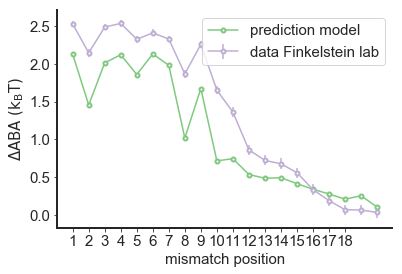

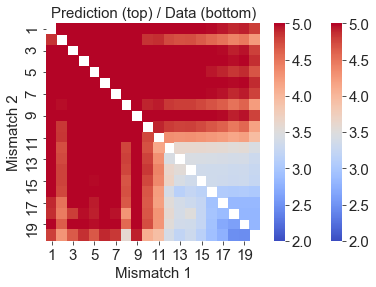

In [39]:
import plotting_simple_fit as pltS
T=60*10
guide_length=20
model_id = 'general_energies_no_kPR'

plt.figure()
_ = pltS.predict_single_mm(Param_conc3,model_id, T, guide_length, show_plot=True, show_data=True, data_file=rawABA)


plt.figure()
best_heatmap = pltABA.predict_double_mm(Param_conc3,model_id,T, guide_length, show_plot=True, show_data=True, data_file=rawABA)

# Cannot do those plots, because do not have block data
# plt.figure()
# _ = pltABA.predict_1D_mmblocks(Param_normal, model_id, T, guide_length, show_plot=True, show_data=True, data_file=rawABA)
# plt.figure()
# _ = pltABA.predict_block_mismatches(Param_normal, model_id, T,guide_length, show_plot=True, show_data=True, data_file=rawABA)



C:\Users\Diewertje\Python\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Users\Diewertje\Python\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


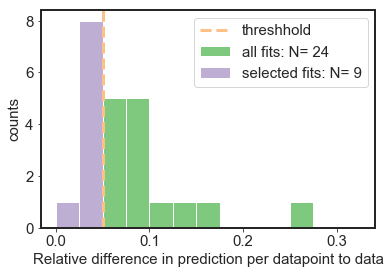

In [9]:
# This does exactly the same as above! To get scores
selected_sims, selected_scores, scores = SAfits.select_on_prediction(simset3, 
                                                         chi_squared, 
                                                         percentage=0.05,
                                                         Nparams=41,
                                                         model_id='general_energies_no_kPR',
                                                         precalculated=False, 
                                                         score=None,
                                                         save_scores=False, 
                                                         filename='../data/25_10_2018/select_with_predcitions.txt'
                                                         ) # do not use filename now

plt.hist(scores, normed=False, bins=np.arange(0,max(scores),0.025), label='all fits: N= ' +str(len(scores)))
plt.hist(selected_scores,normed=False, bins=np.arange(0,max(scores),0.025), label='selected fits: N= ' +str(len(selected_scores)));

plt.axvline(0.05, linestyle='dashed', linewidth=3, color=sns.color_palette()[2], label='threshhold')


plt.legend(fontsize=15);
plt.xlabel('Relative difference in prediction per datapoint to data', fontsize=15);
plt.ylabel('counts', fontsize=15);
plt.xticks(fontsize=15);

plt.yticks(fontsize=15);

# Still old way of selecting: based on the best fit.
# Not based on data

In [10]:
# --- make selection --- 
simset3 = selected_sims 

# --- store resulting fit parameters in a set of Dataframes --- 
matches, mismatches, rates, landscape, free_energy, fast_Rloop = SAfits.process_SA_fits(simset3,44,'general_energies_no_kPR')
forward_rates = rates[['sol_to_PAM','PAM_to_R1','internal']]
matches.loc[best_fit_conc3]

PAM    5.237439
1     -4.181529
2     -3.408062
3      3.127116
4     -0.211355
5     -0.303034
6      1.540037
7     -3.533614
8      1.456277
9     -0.533073
10     6.141990
11     0.936271
12    -0.656390
13    -0.567080
14    -4.867717
15     6.627549
16     0.731001
17    -1.974013
18    -5.258456
19     4.251418
20     6.151085
Name: ../Diewertje/2_5_2019_var_rates_conc3/fit_2_5_2019_var_rates_conc3_sim_10.txt, dtype: float64

C:\Users\Diewertje\Python\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


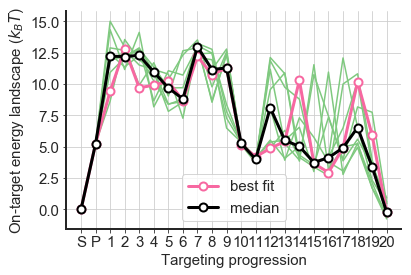

In [11]:
# --- (microscopic) free-energy landscape --- 
plt.figure()
Nparams=41
for filename in simset3:
    parameters = plt_B.load_simm_anneal(filename, Nparams)
    #parameters[0]=3.5 # if want to fix epsilon PAM
    Energy_landscape, FreeEnergy_landscape = FreeEnergy.plot_free_energy_landscape(parameters,model_id='fixed_rates',show_plot=False);
    #plt.figure()
    plt.plot(np.array(Energy_landscape),color=sns.color_palette()[0])
lowest_chi_squared = np.array( landscape.loc[best_fit_conc3] )


plt.plot(np.array(lowest_chi_squared), color='#f768a1' , 
         marker='o', 
         lw=3,
         markersize =8,
         markerfacecolor='white',
         markeredgewidth= 2,
         label='best fit');

LandscapeMED = landscape[landscape.columns[:]].median()
plt.plot(np.array(LandscapeMED),color='black' , 
         marker='o',
         lw=3,
         markersize =8,
         markerfacecolor='white',
         markeredgewidth= 2,
         label='median');

plt.legend(fontsize=15,frameon=True)
plt.xlim(-1,22)
plt.xticks(list(range(0,22)),['S','P']+list(LandscapeMED.index[2:]),  fontsize=15);
plt.yticks(fontsize=15);
plt.xlabel('Targeting progression',fontsize=15)
plt.ylabel('On-target energy landscape ($k_BT$)',fontsize=15)
plt.grid('on')
sns.despine();


# Now selection based on agreement with data

In [96]:
# select based on dataset instead of best fit:
selected_sims, selected_scores, scores = SAfits.select_on_prediction_WA(simset3,
                                                                        percentage=0.018,
                                                                        model_id='general_energies_no_kPR',
                                                                        path='../Data_ABA_Finkelsteinlab/',
                                                                        replica='TargetE-dCas9_AbsoluteABA_Canonical_OT-r_0-2.csv')
# replica is filename of the data in my case!

C:\Users\Diewertje\Python\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Users\Diewertje\Python\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


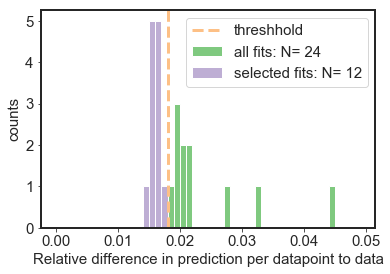

In [97]:
plt.hist(scores, normed=False, bins=np.arange(0,max(scores),0.001), label='all fits: N= ' +str(len(scores)))
plt.hist(selected_scores,normed=False, bins=np.arange(0,max(scores),0.001), label='selected fits: N= ' +str(len(selected_scores)));

plt.axvline(0.018, linestyle='dashed', linewidth=3, color=sns.color_palette()[2], label='threshhold')


plt.legend(fontsize=15);
plt.xlabel('Relative difference in prediction per datapoint to data', fontsize=15);
plt.ylabel('counts', fontsize=15);
plt.xticks(fontsize=15);

plt.yticks(fontsize=15);

In [8]:
scores
# sim 12 has the lowest score!, not the best fit (sim 10)

array([0.01679212, 0.02190376, 0.0169848 , 0.03260258, 0.02169152,
       0.01642861, 0.01977018, 0.04465765, 0.01517664, 0.01516131,
       0.02775865, 0.01493681, 0.02089626, 0.01514409, 0.02067389,
       0.0156097 , 0.01580247, 0.01923694, 0.01939304, 0.01657639,
       0.01832568, 0.01677076, 0.01744162, 0.04964577])

In [9]:
chi_squared

[66822.59581679999,
 74384.8112353,
 63582.746421300006,
 108330.671529,
 71830.5546522,
 67309.8707313,
 69059.67601699999,
 139330.86233099998,
 65621.622351,
 62639.7673181,
 92841.9061396,
 64144.9918599,
 74484.0774046,
 63115.818146000005,
 69823.9554146,
 63084.7779053,
 64254.265707800005,
 69152.71331830001,
 68617.604154,
 66093.6407301,
 68018.6306551,
 65361.8866758,
 63640.145961199996,
 167022.108583]

In [18]:
epsPAM=[]
rates=[]
# Also plot all the selected fits
for sim in simset3:
    concentrations=np.array([0.1,0.3,1,3,10,30,100,300])
    Param=getParm.load_simm_anneal(sim,Nparams)
    epsPAM.append(Param[0])
    rates.append([Param[-2],Param[-1]])
print(epsPAM)
print(rates)

[5.22369170738, 5.23528023281, 5.27021134428, 5.23743861502, 5.24009194766, 5.19768276211, 5.21687576452, 5.2368696354, 5.24702869056]
[[-3.96580130476, 2.63552404865], [-1.54122481734, 2.53718490275], [1.91687146385, 2.46451192569], [-3.98769398388, 2.51333980815], [0.895682617288, 2.73808298958], [-3.98407119547, 2.5326861854], [-4.01910815475, 2.8070023783], [-3.79867246561, 2.97741278825], [-3.98914489633, 2.97666125]]


# Plot of weighted average

In [28]:
#------------To plot weighted average--------
import os
import numpy as np
import pandas as pd
#import Boyle_data_processing as process
#import CRISPR_dCas9_binding_curve_Boyle as dCas9
import matplotlib.pylab as plt
import Prepare_data_Simple as prep

import Calculate_ABA_Finkelsteinlab_Diewertje as ABA

def Weighted_average(row):
    y = np.array(row['ydata'])
    e = np.array(row['yerr'])
    wa=np.average(y, weights=e ** -2, axis=0)
    return wa


def calc_Weighted_average(path='../Data_Boyle/', replica='1', outputdirectory='../Data_Boyle/Weighted_Avarage/',
                          save=True):
    # For me replica is the filename
    xdata, ydata, yerr = prep.Prepare_Cdata(path=path,filename=replica)
    data = pd.DataFrame(columns=['xdata', 'ydata', 'yerr'])
    data['xdata'] = xdata
    data['ydata'] = ydata
    data['yerr'] = yerr
    wa = []
    for i in data.index:
        wa.append(Weighted_average(data.loc[i]))
    WA = pd.DataFrame(columns=['MM_pos', 'WA_data'])
    WA.MM_pos = xdata
    WA.WA_data = wa
    return WA


def predict_train(parameters, model_id='general_energies_no_kPR', path='../Data_Boyle/', replica='1', Plot=True):
    wa = calc_Weighted_average(path=path, replica=replica, save=False)
    prediction=wa.copy()
    concentrations=np.array([0.1,0.3,1.,3.,10.,30.,100.,300.])
    reference=1
    prediction['WA_model']=wa['MM_pos'].apply(lambda x: ABA.calc_ABA(parameters,concentrations,reference,x.tolist(),model_id,guide_length=20,T=10*60))
    score = prediction.dropna().apply(lambda x: np.abs(x['WA_data'] - x['WA_model']) / x['WA_data'], axis=1).mean()
    corr=0
    return score, corr, prediction

percentage=0.1,
model_id='general_energies_no_kPR'
path='../Data_ABA_Finkelsteinlab/'
replica='TargetE-dCas9_AbsoluteABA_Canonical_OT-r_0-2.csv'

WA=calc_Weighted_average(path,replica,save=False)
WA['WA_data_delta']=WA['WA_data']-2.5545002878227865 
# substract ontarget to go to delta ABA


ontarget ABA is: 2.5545002878227865
[2.1259863  1.4559757  2.01195537 2.11969289 1.85827735 2.12978785
 1.97983649 1.01892506 1.67299118 0.71720788 0.74579031 0.53679522
 0.48698013 0.49357553 0.41592626 0.34141384 0.27989835 0.21115186
 0.25555834 0.10819611]
ontarget ABA is: 2.2252597636952443
[2.47672982 1.80616752 2.36422672 2.46802309 2.21237808 2.47676221
 2.32990804 1.31714164 2.01654562 0.97168041 1.00887198 0.75908939
 0.69750773 0.70787539 0.60883256 0.50998223 0.42749153 0.32542898
 0.3923985  0.17065807]


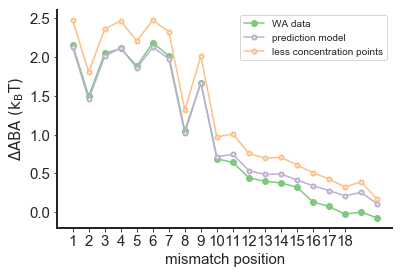

In [29]:
def predict_single_mm(parameters, model_id, T=60 * 10, guide_length=20, show_plot=True, show_data=True,
                      data_file='../Data_ABA_Finkelsteinlab/champ-cas9-cas12a-data/cas9-target-e-replicate-1-delta-abas-processed.csv'):
    #concentrations = np.array([0.1, 0.3, 1, 3, 10, 30, 100, 300]) #2 ** np.array(range(0, 11)) * 0.5
    concentrations = np.array([1,30,100])
    reference_conc = 1 #10
    ontarget_ABA = CalcABA.calc_ABA(parameters, concentrations, reference_conc,
                                    mismatch_positions=[],
                                    model_id=model_id,
                                    guide_length=20,
                                    T=60 * 10)
    print('ontarget ABA is:',ontarget_ABA)
    
    #concentrations = np.array([1,30,100])
    delta_ABA = np.zeros(guide_length)
    for mm_pos in range(1, guide_length + 1):
        delta_ABA[mm_pos - 1] = CalcABA.calc_delta_ABA(parameters, concentrations, reference_conc,
                                                        mismatch_positions=[mm_pos],
                                                       model_id=model_id,
                                                       guide_length=guide_length,
                                                       T=T,
                                                       ontarget_ABA=ontarget_ABA)
    print(delta_ABA)
    
    if show_plot:
        ax = plt.plot(range(1, guide_length + 1),
                      delta_ABA,
                      marker='o',
                      markersize=4,
                      markerfacecolor='white',
                      markeredgewidth=2,
                      linestyle='solid',
                      label='less concentration points')

#         sns.despine()
#         plt.xticks(range(1, 19), fontsize=15);
#         plt.yticks(fontsize=15);
#         plt.xlabel('mismatch position', fontsize=15);
#         plt.ylabel(r'$\Delta \rm{ABA} \ (k_BT)$', fontsize=15)
    return delta_ABA



WAsingle=[]
singlePos=[]
for i in range(len(WA)):
    if (len(WA['MM_pos'][i])==1):
        singlePos.append(WA['MM_pos'][i])
        WAsingle.append(WA['WA_data_delta'][i])

WAsingle_ordered=np.empty(len(WAsingle)+1)
for i in range(1,len(WAsingle)+1):
    WAsingle_ordered[singlePos[i-1]]=WAsingle[i-1]
len(WAsingle_ordered)
plt.figure()
plt.plot(range(1,21),WAsingle_ordered[1:],marker='o',label='WA data')
_ = pltS.predict_single_mm(Param_conc3,model_id, T, guide_length, show_plot=True, show_data=False, data_file=rawABA)
_ = predict_single_mm(Param_conc3,model_id, T, guide_length, show_plot=True, show_data=False, data_file=rawABA)
plt.legend()

9.255886835020402 and 12.864869319139723


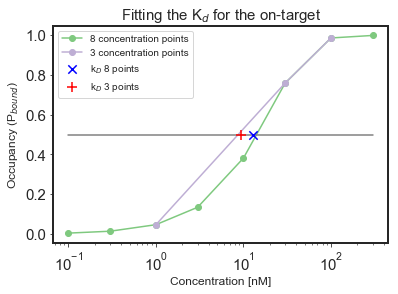

In [103]:
from scipy.optimize import curve_fit

def calc_Pbound(parameters, concentrations, reference, mismatch_positions, model_id = 'general_energies', guide_length = 20, T=10*60):
    #print('at the beginning', concentrations)
    error=0
    zero=0
    rate_matrix = CalcABA.get_master_equation(parameters, mismatch_positions, model_id, guide_length)
    rel_concentration = concentrations/reference
    everything_unbound = np.array([1.0] + [0.0] * (guide_length + 1))
    Pbound = []
    for c in rel_concentration:
        new_rate_matrix = rate_matrix.copy()
        new_rate_matrix[0][0] *= c
        new_rate_matrix[1][0] *= c
        Probability = CalcABA.get_Probability(new_rate_matrix, everything_unbound, T)
        Pbound.append(np.sum(Probability[1:]))
    Pbound = np.array(Pbound)
    concentrations = np.array(concentrations)
    conc3=True
    if(conc3==False):
        Kd, _ = curve_fit(Hill_eq, concentrations,Pbound,maxfev=10000)
    #print('at the end', concentrations)
    if(conc3==True):
        try: # because you do not always get a result from the fit
            Kd, _ = curve_fit(CalcABA.Hill_eq, concentrations,Pbound,maxfev=1000)
        except:
            Kd[0]= 0.0001 # 'error'
            error+=1
        if(Kd[0]<0): 
            Kd[0]=0.0001
            zero+=1
    return Kd[0], Pbound, concentrations,error,zero
concentrations=np.array([1,30,100])
a=calc_Pbound(Param_conc3,concentrations,1,[],model_id=model_id,guide_length=20,T=10*60)
concentrations=np.array([0.1, 0.3, 1, 3, 10, 30, 100, 300])
b=calc_Pbound(Param_conc3,concentrations,1,[],model_id=model_id,guide_length=20,T=10*60)
# so no exception when ontarget-ABA is calculated with 3 concentration points
plt.plot(b[2],b[1],marker='o',label='8 concentration points',zorder=0)
plt.plot(a[2],a[1],marker='o',label='3 concentration points',zorder=0)
plt.plot([0.1,300],[0.5,0.5],color='gray',zorder=0)
plt.scatter(b[0],[0.5],label='k$_D$ 8 points',marker='x',color='b',s=70,zorder=1)
plt.scatter(a[0],[0.5],label='k$_D$ 3 points',marker='+',color='r',s=100,zorder=1)
plt.xscale('log')
plt.title('Fitting the K$_d$ for the on-target', fontsize=15)
plt.xlabel('Concentration [nM]',fontsize=12)
plt.ylabel('Occupancy (P$_{bound}$)',fontsize=12)
plt.legend()
print(a[0],'and',b[0])

185.21480350998448 and 185.14489602457246


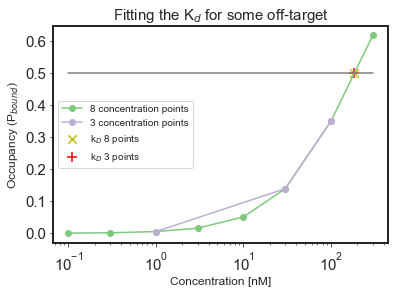

In [102]:
from scipy.optimize import curve_fit

def calc_Pbound(parameters, concentrations, reference, mismatch_positions, model_id = 'general_energies', guide_length = 20, T=10*60):
    #print('at the beginning', concentrations)
    error=0
    zero=0
    rate_matrix = CalcABA.get_master_equation(parameters, mismatch_positions, model_id, guide_length)
    rel_concentration = concentrations/reference
    everything_unbound = np.array([1.0] + [0.0] * (guide_length + 1))
    Pbound = []
    for c in rel_concentration:
        new_rate_matrix = rate_matrix.copy()
        new_rate_matrix[0][0] *= c
        new_rate_matrix[1][0] *= c
        Probability = CalcABA.get_Probability(new_rate_matrix, everything_unbound, T)
        Pbound.append(np.sum(Probability[1:]))
    Pbound = np.array(Pbound)
    concentrations = np.array(concentrations)
    conc3=True
    if(conc3==False):
        Kd, _ = curve_fit(Hill_eq, concentrations,Pbound,maxfev=10000)
    #print('at the end', concentrations)
    if(conc3==True):
        try: # because you do not always get a result from the fit
            Kd, _ = curve_fit(CalcABA.Hill_eq, concentrations,Pbound,maxfev=1000)
        except:
            Kd[0]= 0.0001 # 'error'
            error+=1
        if(Kd[0]<0): 
            Kd[0]=0.0001
            zero+=1
    return Kd[0], Pbound, concentrations,error,zero
d=78
concentrations=np.array([1,30,100])
a=calc_Pbound(Param_conc3,concentrations,1,xdata[d],model_id=model_id,guide_length=20,T=10*60)
concentrations=np.array([0.1, 0.3, 1, 3, 10, 30, 100, 300])
b=calc_Pbound(Param_conc3,concentrations,1,xdata[d],model_id=model_id,guide_length=20,T=10*60)
# so no exception when ontarget-ABA is calculated with 3 concentration points
plt.plot(b[2],b[1],marker='o',label='8 concentration points')
plt.plot(a[2],a[1],marker='o',label='3 concentration points')
plt.plot([0.1,300],[0.5,0.5],color='gray')
plt.scatter(b[0],[0.5],label='k$_D$ 8 points',marker='x',color='y',s=70)
plt.scatter(a[0],[0.5],label='k$_D$ 3 points',marker='+',color='r',s=100)
plt.xscale('log')
plt.title('Fitting the K$_d$ for some off-target', fontsize=15)
plt.xlabel('Concentration [nM]',fontsize=12)
plt.ylabel('Occupancy (P$_{bound}$)',fontsize=12)
plt.legend()
print(a[0],'and',b[0])

In [109]:
from scipy.optimize import curve_fit

def calc_Pbound(parameters, concentrations, reference, mismatch_positions, model_id = 'general_energies', guide_length = 20, T=10*60):
    #print('at the beginning', concentrations)
    error=0
    zero=0
    rate_matrix = CalcABA.get_master_equation(parameters, mismatch_positions, model_id, guide_length)
    rel_concentration = concentrations/reference
    everything_unbound = np.array([1.0] + [0.0] * (guide_length + 1))
    Pbound = []
    for c in rel_concentration:
        new_rate_matrix = rate_matrix.copy()
        new_rate_matrix[0][0] *= c
        new_rate_matrix[1][0] *= c
        Probability = CalcABA.get_Probability(new_rate_matrix, everything_unbound, T)
        Pbound.append(np.sum(Probability[1:]))
    Pbound = np.array(Pbound)
    concentrations = np.array(concentrations)
    conc3=True
    if(conc3==False):
        Kd, _ = curve_fit(Hill_eq, concentrations,Pbound,maxfev=10000)
    #print('at the end', concentrations)
    if(conc3==True):
        try: # because you do not always get a result from the fit
            Kd, _ = curve_fit(CalcABA.Hill_eq, concentrations,Pbound,maxfev=1000)
        except:
            Kd[0]= 0.0001 # 'error'
            error+=1
        if(Kd[0]<0): 
            Kd[0]=0.0001
            zero+=1
    return Kd[0]

right=0
wrong=0
for d in range(len(xdata)):
    concentrations=np.array([1,30,100])
    a=calc_Pbound(Param_conc3,concentrations,1,xdata[d],model_id=model_id,guide_length=20,T=10*60)
    concentrations=np.array([0.1, 0.3, 1, 3, 10, 30, 100, 300])
    b=calc_Pbound(Param_conc3,concentrations,1,xdata[d],model_id=model_id,guide_length=20,T=10*60)
    if ((b-2.5)<a<(b+2.5)):
        right+=1
    else:
        wrong+=1
        print(a,'and',b)
print('right=',right)
print('wrong=',wrong)

15.413472919627 and 18.100039665908668
14.193034165199887 and 17.020161892803475
14.198870509402136 and 17.024918071105052
14.198993877382934 and 17.025017666681375
14.198206727610268 and 17.024361657303047
12.815927669877805 and 15.889398777007274
13.837063370275848 and 16.722366878717867
13.675030732152653 and 16.587507867782943
13.703595802283058 and 16.610892090137273
13.823130878624774 and 16.710720396127336
10.97826963659449 and 14.334889612747185
right= 199
wrong= 11


Text(0.5, 1.0, 'Prediction (top) / WA (bottom)')

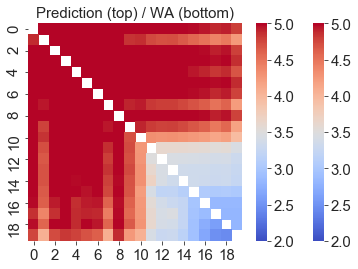

In [11]:
#-----For double mismatches-----
WAdouble=[]
doublePos=[]
for i in range(len(WA)):
    if (len(WA['MM_pos'][i])==2):
        doublePos.append(WA['MM_pos'][i])
        WAdouble.append(WA['WA_data'][i])
mapABA=np.zeros([20,20])
mapABA[:]=np.nan
for i in range(len(doublePos)):
    mapABA[doublePos[i][0]-1,doublePos[i][1]-1]=WAdouble[i]

import seaborn as sns
plt.figure()
best_heatmap = pltABA.predict_double_mm(Param_conc3,model_id,T, guide_length, show_plot=True, show_data=False, data_file=rawABA)

sns.heatmap(mapABA.transpose(), cmap='coolwarm', cbar=True, vmin=2,vmax=5)
plt.title('Prediction (top) / WA (bottom)',fontsize=15)

Text(29.0, 0.5, 'Mismatch 2')

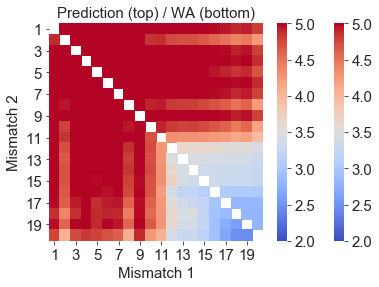

In [33]:
# with less concentration points
def predict_double_mm(parameters, model_id, T=60 * 10, guide_length=20, show_plot=True, show_data=True,
                      data_file='../Data_ABA_Finkelsteinlab/champ-cas9-cas12a-data/cas9-target-e-replicate-1-delta-abas-processed.csv'):
    concentrations = np.array([0.1, 0.3, 1, 3, 10, 30, 100, 300]) #2 ** np.array(range(0, 11)) * 0.5
    #concentrations = np.array([1,30,100])
    reference_conc = 1 #10
    ontarget_ABA = 42#CalcABA.calc_ABA(parameters, concentrations, reference_conc,
                                   # mismatch_positions=[],
                                   # model_id=model_id,
                                   # guide_length=20,
                                    #T=60 * 10)

    delta_ABA_mat = np.zeros((guide_length, guide_length))
    for first_mm in range(1, guide_length + 1):
        for second_mm in range(1, guide_length + 1):
            delta_ABA_mat[first_mm - 1, second_mm - 1] = CalcABA.calc_ABA(parameters, concentrations,
                                                                                reference_conc,
                                                                                mismatch_positions=[first_mm,
                                                                                                    second_mm],
                                                                                model_id=model_id,
                                                                                guide_length=guide_length,
                                                                                T=T)
            # this should be calc_delta_ABA if we do not work wit rawABA dataset
            
    if show_plot:
        axHeatmap = sns.heatmap(delta_ABA_mat, cmap='coolwarm', mask=np.tril(delta_ABA_mat),vmin=2, vmax=5)
        plt.grid()
        ax = plt.gca()
        ax.set_xticklabels(list(map(lambda x: str(int(x)), ax.get_xticks() + 0.5)), fontsize=15);
        ax.set_yticklabels(list(map(lambda x: str(int(x)), 20 - ax.get_yticks() + 0.5)), fontsize=15, rotation=0);
        str_title = 'Prediction (top)'

        plt.title(str_title, fontsize=15)
        plt.xlabel('Mismatch 1', fontsize=15)
        plt.ylabel('Mismatch 2', fontsize=15)
    return delta_ABA_mat

WAdouble=[]
doublePos=[]
for i in range(len(WA)):
    if (len(WA['MM_pos'][i])==2):
        doublePos.append(WA['MM_pos'][i])
        WAdouble.append(WA['WA_data'][i])
mapABA=np.zeros([20,20])
mapABA[:]=np.nan
for i in range(len(doublePos)):
    mapABA[doublePos[i][0]-1,doublePos[i][1]-1]=WAdouble[i]

import seaborn as sns
plt.figure()
best_heatmap = predict_double_mm(Param_conc3,model_id,T, guide_length, show_plot=True, show_data=False, data_file=rawABA)

sns.heatmap(mapABA.transpose(), cmap='coolwarm', cbar=True, vmin=2,vmax=5)
plt.title('Prediction (top) / WA (bottom)',fontsize=15)
ax = plt.gca()
ax.set_xticklabels(list(map(lambda x: str(int(x)), ax.get_xticks() + 0.5)), fontsize=15);
ax.set_yticklabels(list(map(lambda x: str(int(x)), ax.get_yticks() + 0.5)), fontsize=15, rotation=0);
plt.xlabel('Mismatch 1', fontsize=15)
plt.ylabel('Mismatch 2', fontsize=15)

# To calculate the chisquared of WA compared to data

In [20]:
score,corr,prediction=predict_train(Param_conc3,
                                    model_id='general_energies_no_kPR',
                                    path=path,replica=replica,Plot=True)
prediction
parts=[]
for i in range(len(ydata)):
    parts.append(sum((np.array(ydata[i])-(prediction['WA_data'][i]*np.ones(len(ydata[i]))))**2/(np.array(yerr[i])**2)))
    
chi_squared_WA=sum(np.array(parts))

Chi_square_WA=[]
for i in range(len(ydata)):
    Chi_square_WA.append(sum(((np.array(WA['WA_data'][i])-np.array(ydata[i]))/np.array(yerr[i]))**2))
sum(Chi_square_WA)
    
# other way to calculate it:
# Chi_square_WA=[]
# for i in range(len(ydata)):
#     Chi_square_WA.append(sum(((np.array(WA['WA_data'][i])-np.array(ydata[i]))/np.array(yerr[i]))**2))
# sum(Chi_square_WA)
    

In [21]:
chi_squared_WA

58708.93982492189

In [136]:
np.abs(np.array(chi_squared)-chi_squared_WA)/chi_squared_WA

array([0.0017861 , 0.11118031, 0.05018384, 0.6182727 , 0.07302414,
       0.00549295, 0.03163201, 1.08136188, 0.01972656, 0.06427032,
       0.38689735, 0.04178487, 0.11266317, 0.05715894, 0.04304902,
       0.05762263, 0.0401525 , 0.03302182, 0.02502822, 0.01267543,
       0.01608059, 0.02360656, 0.04932639, 1.49502116])

# FROM NOW IT IS NORMAL CODE AGAIN

In [98]:
# --- make selection --- 
simset3 = selected_sims 

# --- store resulting fit parameters in a set of Dataframes --- 
matches, mismatches, rates, landscape, free_energy, fast_Rloop = SAfits.process_SA_fits(simset3,44,'general_energies_no_kPR')
forward_rates = rates[['sol_to_PAM','PAM_to_R1','internal']]
matches.loc[best_fit_conc3]

PAM    5.237439
1     -4.181529
2     -3.408062
3      3.127116
4     -0.211355
5     -0.303034
6      1.540037
7     -3.533614
8      1.456277
9     -0.533073
10     6.141990
11     0.936271
12    -0.656390
13    -0.567080
14    -4.867717
15     6.627549
16     0.731001
17    -1.974013
18    -5.258456
19     4.251418
20     6.151085
Name: ../Diewertje/2_5_2019_var_rates_conc3/fit_2_5_2019_var_rates_conc3_sim_10.txt, dtype: float64

C:\Users\Diewertje\Python\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


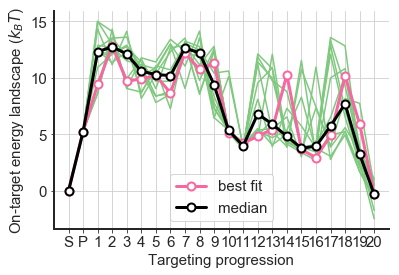

In [99]:
# --- (microscopic) free-energy landscape --- 
plt.figure()
Nparams=41
for filename in simset3:
    parameters = plt_B.load_simm_anneal(filename, Nparams)
    #parameters[0]=3.5 # if want to fix epsilon PAM
    Energy_landscape, FreeEnergy_landscape = FreeEnergy.plot_free_energy_landscape(parameters,model_id='fixed_rates',show_plot=False);
    #plt.figure()
    plt.plot(np.array(Energy_landscape),color=sns.color_palette()[0])
lowest_chi_squared = np.array( landscape.loc[best_fit_conc3] )


plt.plot(np.array(lowest_chi_squared), color='#f768a1' , 
         marker='o', 
         lw=3,
         markersize =8,
         markerfacecolor='white',
         markeredgewidth= 2,
         label='best fit');

LandscapeMED = landscape[landscape.columns[:]].median()
plt.plot(np.array(LandscapeMED),color='black' , 
         marker='o',
         lw=3,
         markersize =8,
         markerfacecolor='white',
         markeredgewidth= 2,
         label='median');

plt.legend(fontsize=15,frameon=True)
plt.xlim(-1,22)
plt.xticks(list(range(0,22)),['S','P']+list(LandscapeMED.index[2:]),  fontsize=15);
plt.yticks(fontsize=15);
plt.xlabel('Targeting progression',fontsize=15)
plt.ylabel('On-target energy landscape ($k_BT$)',fontsize=15)
plt.grid('on')
sns.despine();


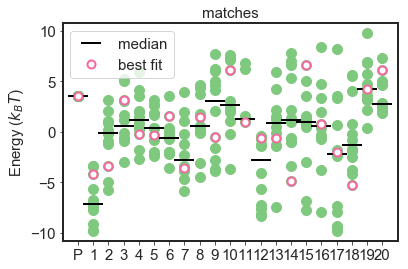

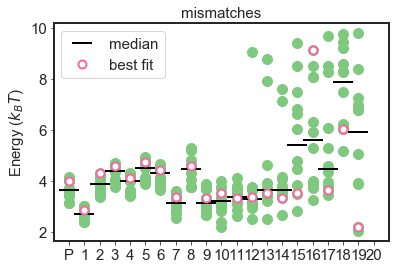

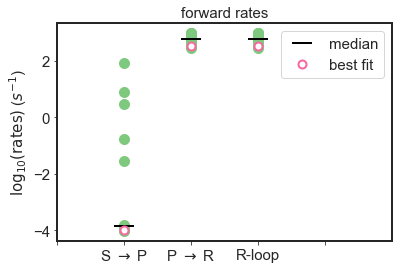

In [14]:
# ---- show fluctuations in parameter sets --- 
# THIS IS THE RESULT

# --- Matches ---
# MAYBE WE WANT TO NEGATE (multiply by -1 all the epsilonC to have the same sign convention as EpsilonPAM and EpsilonI)
plt.figure()
for sim in simset3:
    matches.loc[sim].plot(marker='o',markersize=10,linestyle='', color=sns.color_palette()[0], alpha=1.0,label='')

matches.median().plot(color='black',
            linestyle='',
             marker='_', 
             lw=4,
             markersize =20,
             markerfacecolor='white',
             markeredgewidth= 2,
        label='median')    

matches.loc[best_fit_conc3].plot(color='#f768a1',
            linestyle='',
             marker='o', 
             lw=3,
             markersize =8,
             markerfacecolor='white',
             markeredgewidth= 2,
        label='best fit')



plt.title('matches',fontsize=15)
plt.xticks(list(range(0,21)),['P']+list(range(1,21)),fontsize=15);
plt.xlim(-1,21);
plt.yticks(fontsize=15);
plt.ylabel('Energy ($k_BT$)',fontsize=15);
plt.legend(fontsize=15,frameon=True);

# --- Mismatches --- 
plt.figure()
for sim in simset3:
    mismatches.loc[sim].plot(marker='o',markersize=10,linestyle='', color=sns.color_palette()[0], alpha=1.0,label='')

mismatches.median().plot(color='black',
            linestyle='',
             marker='_', 
             lw=4,
             markersize =20,
             markerfacecolor='white',
             markeredgewidth= 2,
        label='median')    
    

mismatches.loc[best_fit_conc3].plot(color='#f768a1',
            linestyle='',
             marker='o', 
             lw=3,
             markersize =8,
             markerfacecolor='white',
             markeredgewidth= 2,
        label='best fit')



plt.title('mismatches',fontsize=15)
plt.xticks(list(range(0,21)),['P']+list(range(1,21)),fontsize=15);
plt.xlim(-1,21);
plt.yticks(fontsize=15);
plt.ylabel('Energy ($k_BT$)',fontsize=15);
plt.legend(fontsize=15,frameon=True);


# --- 10log of the forward rates --- 
plt.figure()
for sim in simset3:
    forward_rates.loc[sim].apply(np.log10).plot(marker='o',markersize=10,linestyle='', color=sns.color_palette()[0], alpha=1.0,label='')

forward_rates.median().apply(np.log10).plot(color='black',
            linestyle='',
             marker='_', 
             lw=4,
             markersize =20,
             markerfacecolor='white',
             markeredgewidth= 2,
        label='median')    
    
    

forward_rates.loc[best_fit_conc3].apply(np.log10).plot(color='#f768a1',
            linestyle='',
             marker='o', 
             lw=3,
             markersize =8,
             markerfacecolor='white',
             markeredgewidth= 2,
        label='best fit')



plt.title('forward rates',fontsize=15)
plt.xticks(range(-1,4),['',r'S $\rightarrow$ P',r'P $\rightarrow$ R','R-loop',''],fontsize=15);
plt.xlim(-1,4);
plt.yticks(fontsize=15);
plt.ylabel(r'$\log_{10}(\rm{rates})$ ($s^{-1}$)',fontsize=15);
plt.legend(fontsize=15,frameon=True);




In [15]:
forward_rates['PAM_to_R1'].mean()

621.6615479444603

In [16]:
forward_rates.loc[best_fit_conc3]

sol_to_PAM      0.000103
PAM_to_R1     326.091748
internal      326.091748
Name: ../Diewertje/2_5_2019_var_rates_conc3/fit_2_5_2019_var_rates_conc3_sim_10.txt, dtype: float64

# To compare with Boyle e-mailed file + rates

In [12]:
# To load other paramter sets, to choose one with low Ksp, to see if that will give a good fit.
import plotting_Boyle_Diewertje as plt_B
model_id = 'general_energies_no_kPR'
# filename = simset[np.argsort(chi_squared)[3]]
filename = np.array(['../data/22_3_2019/fit_22_3_2019_sim_4.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_5.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_6.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_7.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_9.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_13.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_17.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_21.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_26.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_31.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_33.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_35.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_47.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_49.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_50.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_51.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_53.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_54.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_56.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_59.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_63.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_67.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_68.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_69.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_79.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_80.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_82.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_83.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_87.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_90.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_97.txt'])
Nparams = 43
ref_Ksp=10000 # just a big number
for i in range(0,len(filename)):
    p= plt_B.load_simm_anneal(filename[i], Nparams)
    Ksp=10**p[-2]/10
    if(Ksp<ref_Ksp):
        ref_Ksp=Ksp
        parameters=p
        name=filename[i]


In [13]:
name

'../data/22_3_2019/fit_22_3_2019_sim_9.txt'

In [ ]:
# first run the cell before!!!
parameters
rates=parameters[-2].copy()
rates=rates-1
parameters[-2]=rates
parameters
epsilonPAM=parameters[0].copy()
epsilonPAM=epsilonPAM+np.log(10)
parameters[0]=epsilonPAM
parameters

In [ ]:
len(parameters)

In [ ]:
# to get chi-squared for Boyle
import Chisq_Finkelstein as chin
chi_BoyleR=[]
for i in range(0,len(xdata)):
    chi_BoyleR.append(chin.calc_Chi_square(parameters,xdata[i],ydata[i],yerr[i],
                                concentrations, reference=1, 
                                ontarget_ABA=42,guide_length=20,
                                model_id='general_energies_no_kPR'))

In [ ]:
# to plot boyle in this graph
Param_Boyle=np.loadtxt('parameters_Boyle.txt')
epsC = np.array(Param_Boyle[:21].copy())
epsC[0]+=np.log(10)
epsC[1:] *= -1

epsCr = np.array(parameters[:21].copy())
epsCr[0]+=np.log(10)
epsCr[1:] *= -1

epsC_fit=np.array(Param_conc3[:21]).copy()
epsC_fit[0]=epsC[0]
epsC_fit[1:] *= -1


plt.plot(range(0,21),np.cumsum(epsC_fit),marker='o',label='Fit')
plt.plot(range(0,21),np.cumsum(epsC),marker='o',label='Boyle (e-mail)')
plt.plot(range(0,21),np.cumsum(epsCr),marker='o',label='Boyle (rates)')
plt.title('Epsilon C')
plt.legend()

In [ ]:
# to get chi-squared for Boyle
import Chisq_Finkelstein as chin
chi_Boyle=[]
for i in range(0,len(xdata)):
    chi_Boyle.append(chin.calc_Chi_square(Param_Boyle,xdata[i],ydata[i],yerr[i],
                                concentrations, reference=1, 
                                ontarget_ABA=42,guide_length=20,
                                model_id='init_limit_general_energies_v2'))
print('The chi-squared of Boyle is: ',np.sum(chi_Boyle))

In [ ]:
print('The chi-squared of the best fit is:',chi_squared[3-1])
print('The chi-squared of Boyle (e-mailed) is: ',np.sum(chi_Boyle))
print('The chi-squared of Boyle from rates is:',np.sum(chi_BoyleR) )

In [ ]:
plt.plot(range(0,20),Param_conc3[21:],marker='o',label='Fit')
plt.plot(range(0,20),Param_Boyle[21:41],marker='o',label='Boyle (e-mail)')
plt.plot(range(0,20),parameters[21:41],marker='o',label='Boyle (rates)')
plt.title('Epsilon I')
plt.legend()

# Try prediction of on target for all boyle parameters

In [ ]:
# To load other paramter sets, to choose one with low Ksp, to see if that will give a good fit.
import plotting_Boyle_Diewertje as plt_B
import Calculate_ABA_Finkelsteinlab_Diewertje as CalcABA
model_id = 'general_energies_no_kPR'
filename = np.array(['../data/22_3_2019/fit_22_3_2019_sim_4.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_5.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_6.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_7.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_9.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_13.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_17.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_21.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_26.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_31.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_33.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_35.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_47.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_49.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_50.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_51.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_53.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_54.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_56.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_59.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_63.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_67.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_68.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_69.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_79.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_80.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_82.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_83.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_87.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_90.txt',
       '../data/22_3_2019/fit_22_3_2019_sim_97.txt'])
Nparams = 43
ref_Ksp=10000 # just a big number
ontarget_ABA=[]
for i in range(0,len(filename)):
    parameters= plt_B.load_simm_anneal(filename[i], Nparams)
    concentrations=np.array([0.1, 0.3, 1, 3, 10, 30, 100, 300]) #2 ** np.array(range(0, 11)) * 0.5
    reference_conc = 10 
    ontarget_ABA.append(CalcABA.calc_ABA(parameters, concentrations, reference_conc,
                                         mismatch_positions=[],model_id=model_id,
                                         guide_length=20,T=60 * 10))
    

In [ ]:
ontarget_ABA

# Analyse best fits

In [ ]:
plt.figure()
Nparams=41
model_id='fixed_rates'
for filename in selected_sims:
    parameters = plt_B.load_simm_anneal(filename, Nparams)
    _ = pltS.predict_single_mm(parameters,model_id, T, guide_length, show_plot=True, show_data=True, data_file=rawABA)

# Compare best fit to not selecte fits

In [ ]:
selected_sims

In [ ]:
best_fit_conc3

In [ ]:
simset3[8:13]

In [ ]:
plt.figure()
Nparams=41
model_id='fixed_rates'
not_selected=simset3[8:13]

cmap = plt.get_cmap('Set3')
colors = [cmap(i) for i in np.linspace(0, 1, len(not_selected))] 
count=0 

for filename in not_selected:
    parameters = plt_B.load_simm_anneal(filename, Nparams)
    #_ = pltS.predict_single_mm(parameters,model_id, T, guide_length, show_plot=True, show_data=True, data_file=rawABA)
    concentrations = np.array([0.1, 0.3, 1, 3, 10, 30, 100, 300]) #2 ** np.array(range(0, 11)) * 0.5
    reference_conc = 1 #10
    ontarget_ABA = CalcABA.calc_ABA(parameters, concentrations, reference_conc,
                                    mismatch_positions=[],
                                    model_id=model_id,
                                    guide_length=20,
                                    T=60 * 10)

    delta_ABA = np.zeros(guide_length)
    for mm_pos in range(1, guide_length + 1):
        delta_ABA[mm_pos - 1] = CalcABA.calc_delta_ABA(parameters, concentrations, reference_conc,
                                                        mismatch_positions=[mm_pos],
                                                       model_id=model_id,
                                                       guide_length=guide_length,
                                                       T=T,
                                                       ontarget_ABA=ontarget_ABA)
    
    ax = plt.plot(range(1, guide_length + 1),
                  delta_ABA,
                  marker='o',
                  markersize=4,
                  markerfacecolor='white',
                  markeredgewidth=2,
                  linestyle='solid',
                  c=colors[count])

    sns.despine()
    plt.xticks(range(1, 19), fontsize=15);
    plt.yticks(fontsize=15);
    plt.xlabel('mismatch position', fontsize=15);
    plt.ylabel(r'$\Delta \rm{ABA} \ (k_BT)$', fontsize=15)
    count=count+1

# to plot the best if tin the same graph
parameters = plt_B.load_simm_anneal(filename, Nparams)
#_ = pltS.predict_single_mm(parameters,model_id, T, guide_length, show_plot=True, show_data=True, data_file=rawABA)
concentrations = np.array([0.1, 0.3, 1, 3, 10, 30, 100, 300]) #2 ** np.array(range(0, 11)) * 0.5
reference_conc = 1 #10
ontarget_ABA = CalcABA.calc_ABA(parameters, concentrations, reference_conc,
                                mismatch_positions=[],
                                model_id=model_id,
                                guide_length=20,
                                T=60 * 10)

delta_ABA = np.zeros(guide_length)
for mm_pos in range(1, guide_length + 1):
    delta_ABA[mm_pos - 1] = CalcABA.calc_delta_ABA(parameters, concentrations, reference_conc,
                                                    mismatch_positions=[mm_pos],
                                                   model_id=model_id,
                                                   guide_length=guide_length,
                                                   T=T,
                                                   ontarget_ABA=ontarget_ABA)

ax = plt.plot(range(1, guide_length + 1),
              delta_ABA,
              marker='o',
              markersize=4,
              markerfacecolor='white',
              markeredgewidth=2,
              linestyle='solid',
              label='Best fit',
              c='r')

sns.despine()
plt.xticks(range(1, 19), fontsize=15);
plt.yticks(fontsize=15);
plt.xlabel('mismatch position', fontsize=15);
plt.ylabel(r'$\Delta \rm{ABA} \ (k_BT)$', fontsize=15)
    
# To plot the data in the same graph
def plot_single_mut_ABA(data, Mut_type, data_name='Finkelstein Data', Canonical=True, Plot=True):
    Mut_names = {'r': 'Mismatch', 'i': 'Insertion', 'd': 'Deletion'}
    Mut_name = Mut_names[Mut_type]

    data['Mutation Type'].fillna('', inplace=True)
    single_mut_data = data[(data['Canonical'] == Canonical) & (data['Mutation Type'] == Mut_type)][
        ['Mutation ID', 'ABA', 'error']]
    single_mut_data['ABA']=single_mut_data['ABA']-single_mut_data['ABA'].iloc[0] # the row with the ontarget value
    single_mut_data['Position'] = single_mut_data['Mutation ID'].apply(lambda x: int(x.split(':')[1]))
    single_mut_data_mean = single_mut_data[['Position', 'ABA', 'error']].groupby(
        'Position').mean().reset_index()

    if Plot:
        single_mut_data_mean.plot(x='Position', y='ABA', yerr='error', marker='o', linewidth=1,
                                  color='blue')
        plt.xlabel(Mut_name + ' postion', fontsize=15)
        plt.ylabel('$\Delta$ABA', fontsize=15)
        plt.title(data_name, fontsize=15)
        if not Canonical:
            plt.title(data_name + ' - Noncanonical', fontsize=15)

    return single_mut_data_mean

IlyaData = rawABA #pd.read_csv(data_file)
single_mut_data_mean = plot_single_mut_ABA(data=IlyaData, Mut_type='r', Plot=False)

plt.errorbar(x=single_mut_data_mean['Position'],
             y=single_mut_data_mean['ABA'],
             yerr=single_mut_data_mean['error'],
             marker='o',
             markersize=4,
             markerfacecolor='white',
             markeredgewidth=2,
             linestyle='solid',
             label='data Finkelstein lab',
             c='b')
plt.legend(fontsize=15, loc='best')

In [ ]:
b=[]
for filename in not_selected:
    parameters = plt_B.load_simm_anneal(filename, Nparams)
    plt.figure()
    b.append(pltABA.predict_double_mm(parameters,model_id,T, guide_length, show_plot=True, show_data=True, data_file=rawABA))

In [ ]:
parameters1 = plt_B.load_simm_anneal(not_selected[0], Nparams)
parameters1
epsC_fit_not=np.array(parameters1[:21]).copy()
epsC_fit_not[1:] *= -1

parameters2 = plt_B.load_simm_anneal(not_selected[1], Nparams)
parameters2
epsC_fit_not2=np.array(parameters2[:21]).copy()
epsC_fit_not2[1:] *= -1

parameters3 = plt_B.load_simm_anneal(not_selected[2], Nparams)
parameters3
epsC_fit_not3=np.array(parameters3[:21]).copy()
epsC_fit_not3[1:] *= -1

parameters4 = plt_B.load_simm_anneal(not_selected[3], Nparams)
parameters4
epsC_fit_not4=np.array(parameters4[:21]).copy()
epsC_fit_not4[1:] *= -1

parameters5 = plt_B.load_simm_anneal(not_selected[4], Nparams)
parameters5
epsC_fit_not5=np.array(parameters5[:21]).copy()
epsC_fit_not5[1:] *= -1

In [ ]:
plt.plot(range(0,21),np.cumsum(epsC_fit),marker='o',label='Best Fit')
plt.plot(range(0,21),np.cumsum(epsC_fit_not),marker='o',label='Not Selected Fit')
plt.plot(range(0,21),np.cumsum(epsC_fit_not2),marker='o',label='Not Selected Fit')
plt.plot(range(0,21),np.cumsum(epsC_fit_not3),marker='o',label='Not Selected Fit')
plt.plot(range(0,21),np.cumsum(epsC_fit_not4),marker='o',label='Not Selected Fit')
plt.plot(range(0,21),np.cumsum(epsC_fit_not5),marker='o',label='Not Selected Fit')
plt.title('Epsilon C')
plt.legend()

In [ ]:
plt.plot(range(0,20),Param_conc3[21:],marker='o',label='Best Fit')
plt.plot(range(0,20),parameters1[21:],marker='o',label='Not Selected Fit')
plt.plot(range(0,20),parameters2[21:],marker='o',label='Not Selected Fit')
plt.plot(range(0,20),parameters3[21:],marker='o',label='Not Selected Fit')
plt.plot(range(0,20),parameters4[21:],marker='o',label='Not Selected Fit')
plt.plot(range(0,20),parameters5[21:],marker='o',label='Not Selected Fit')
plt.title('Epsilon I')
plt.ylim(1.5,4.5)
plt.legend()
# looks like after 12 it does something weird, is the same as we see in the double mismatch heatmaps.
# IT IS NOT ALLOWED TO BE NEGATIVE!!! Adjusted the lower bound in the pipeline!
# this hopefully results in more selected fits! since now it will not deviate in the end anymore.

In [ ]:
fit_process=sa = pd.read_csv(best_fit_conc3, delimiter='\t', index_col=43)
plt.hist(fit_process['Parameter 22'])

# See if we can predict block mismatches in other dataset

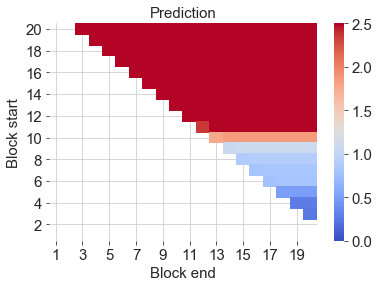

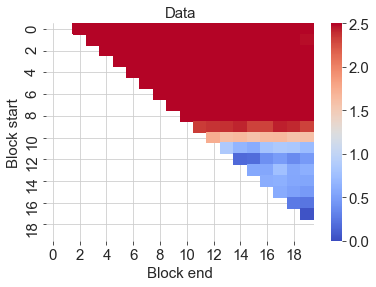

In [24]:
blockdata=pd.read_csv('../Data_ABA_Finkelsteinlab/cas9-target-e-replicate-1-delta-abas_Canonical_OT-r_0-20.csv')
blockdata

_ = pltABA.predict_block_mismatches(Param_conc3,model_id, T, guide_length, show_plot=True, show_data=True,data_file=blockdata)

In [28]:
CalcABA.get_energies(Param_conc3[21:-2],[])

[3.98643167213,
 -2.86252467481,
 -4.30221922241,
 -4.57704365812,
 -4.09586733175,
 -4.71697676101,
 -4.4268971356,
 -3.34516233718,
 -4.5874652719,
 -3.30473320832,
 -3.51175881087,
 -3.33550961341,
 -3.34581938956,
 -3.50474690516,
 -3.33128018474,
 -3.52221103658,
 -9.127628411,
 -3.63466381703,
 -6.02322255423,
 -2.18386604523]

# See if equilibrium holds!

In [28]:
# Only if want to do for BOYLE!!!!
model_id = 'general_energies_no_kPR'
# filename = simset[np.argsort(chi_squared)[3]]
# filename = simset[0]
filename = '../data/22_3_2019/fit_22_3_2019_sim_13.txt'
Nparams = 43
Param_conc3 = plt_B.load_simm_anneal(filename, Nparams)

In [40]:
ABAnorm=[]
ABAeq=[]
epsilon=Param_conc3[:-2]
concentrations = np.array([0.1, 0.3, 1, 3, 10, 30, 100, 300]) #2 ** np.array(range(0, 11)) * 0.5

for i in range(len(xdata)):
    ABAnorm.append(CalcABA.calc_ABA(Param_conc3,concentrations,1,xdata[i],model_id))
    energies=CalcABA.get_energies(epsilon,xdata[i], guide_length=20)
    ABAeq.append(-np.log(np.sum(np.exp(-np.cumsum(energies)))))
    

In [41]:
def predict_block_mismatches_eq(parameters, model_id, T=60 * 10, guide_length=20, show_plot=True, show_data=True,
                             data_file = '../Data_ABA_Finkelsteinlab/champ-cas9-cas12a-data/cas9-target-e-replicate-1-delta-abas-processed.csv'):
    concentrations = np.array([0.1, 0.3, 1, 3, 10, 30, 100, 300]) #2 ** np.array(range(0, 11)) * 0.5
    reference_conc = 1 #10
    ontarget_ABA = CalcABA.calc_ABA(parameters, concentrations, reference_conc,
                                    mismatch_positions=[],
                                    model_id=model_id,
                                    guide_length=20,
                                    T=60 * 10)

    delta_ABA_mat = np.zeros((guide_length, guide_length))
    delta_ABA_mat[:] = np.nan

    for start_of_block in range(1, guide_length + 1):
        for end_of_block in range(start_of_block + 2, guide_length + 1):
            mm_block = list(range(start_of_block, end_of_block)) # Python 3! for python 2, remove the list around it!
            energies_simple=CalcABA.get_energies(epsilon,mm_block, guide_length)
            delta_ABA_mat[start_of_block - 1, end_of_block - 1] = -np.log(np.sum(np.exp(-np.cumsum(energies_simple))))
            

    return delta_ABA_mat

def predict_block_mismatches_normal(parameters, model_id, T=60 * 10, guide_length=20, show_plot=True, show_data=True,
                             data_file = '../Data_ABA_Finkelsteinlab/champ-cas9-cas12a-data/cas9-target-e-replicate-1-delta-abas-processed.csv'):
    concentrations = np.array([0.1, 0.3, 1, 3, 10, 30, 100, 300]) #2 ** np.array(range(0, 11)) * 0.5
    reference_conc = 1 #10
    delta_ABA_mat = np.zeros((guide_length, guide_length))
    delta_ABA_mat[:] = np.nan

    for start_of_block in range(1, guide_length + 1):
        for end_of_block in range(start_of_block + 2, guide_length + 1):
            mm_block = list(range(start_of_block, end_of_block)) # Python 3! for python 2, remove the list around it!
            delta_ABA_mat[start_of_block - 1, end_of_block - 1] = CalcABA.calc_ABA(parameters, concentrations,
                                                                                         reference_conc,
                                                                                         mismatch_positions=mm_block,
                                                                                         model_id=model_id,
                                                                                         guide_length=guide_length,
                                                                                         T=T)

    return delta_ABA_mat

blocks_eq = predict_block_mismatches_eq(Param_conc3, model_id=model_id, 
                                               T=60*10,guide_length=20,show_plot=False)




blocks_normal = predict_block_mismatches_normal(Param_conc3, model_id=model_id, 
                                               T=60*10,guide_length=20,show_plot=False)


In [42]:
normal=ABAnorm+blocks_normal.tolist()
eq=ABAeq+blocks_eq.tolist()
C = np.corrcoef(blocks_normal,blocks_eq)[1,0]
#plt.title('correlation coefficient: ' + str(C) , fontsize=20);
C

nan

In [43]:
diff=[]
for i in range(len(xdata)):
    if(len(xdata[i])==1): 
        diff.append(abs(np.array(ABAnorm[i])-np.array(ABAeq[i])))
diff
        

[1.205587700660491,
 0.3974353511433488,
 0.35607747472108775,
 0.5000125438308265,
 0.5390241668844107,
 0.5114444123235082,
 0.5267501365052656,
 0.6246958328004739,
 0.6902844400020971,
 0.9186309716489374,
 0.7502600800502912,
 1.5372812791239094,
 1.3495455164969974,
 0.8409841184162792,
 0.7454265976587058,
 0.8548381295489258,
 0.6612189303151723,
 0.7277513482558047,
 0.662318125348667,
 0.30548399334569254]

-0.32710210940874657
ontarget ABA is: 2.5545002878227865
[2.1259863  1.4559757  2.01195537 2.11969289 1.85827735 2.12978785
 1.97983649 1.01892506 1.67299118 0.71720788 0.74579031 0.53679522
 0.48698013 0.49357553 0.41592626 0.34141384 0.27989835 0.21115186
 0.25555834 0.10819611]


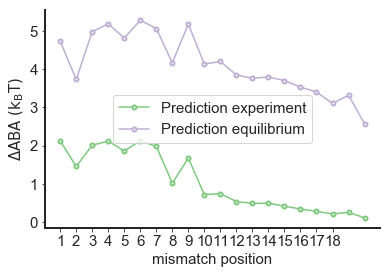

In [44]:
ABA_simple=[]
epsilon = Param_conc3[:-2]
for mm_pos in range(1, guide_length + 1):
    energies_simple=CalcABA.get_energies(epsilon,[mm_pos], guide_length)
    ABA_simple.append(-np.log(np.sum(np.exp(-np.cumsum(energies_simple)))))
ABA_simple

ABA_simple_on=-np.log(np.sum(np.exp(-np.cumsum(CalcABA.get_energies(epsilon,[],guide_length)))))
print(ABA_simple_on)
ABA_simple_delta=ABA_simple-ABA_simple_on
ABA_simple_delta

normalSingle = pltS.predict_single_mm(Param_conc3,model_id, T, guide_length, show_plot=False, show_data=False, data_file=rawABA)

plt.plot(range(1,21),normalSingle,marker='o',markersize=4,markerfacecolor='white',markeredgewidth=2,linestyle='solid',label='Prediction experiment')
plt.plot(range(1,21),np.array(ABA_simple)+1.2599085983218907,marker='o',markersize=4,markerfacecolor='white',markeredgewidth=2,linestyle='solid',label='Prediction equilibrium')
plt.xticks(range(1, 19), fontsize=15);
plt.yticks(fontsize=15);
plt.xlabel('mismatch position', fontsize=15);
plt.ylabel(r'$\Delta \rm{ABA} \ (k_BT)$', fontsize=15)
plt.legend(fontsize=15, loc='best')
sns.despine()

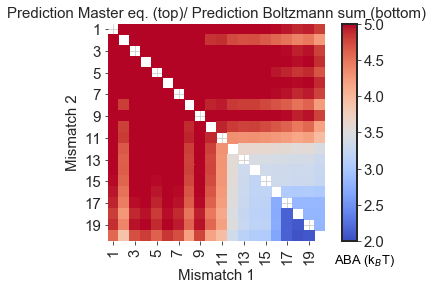

In [78]:
def predict_double_mm_normal(parameters, model_id, T=60 * 10, guide_length=20, show_plot=True, show_data=True,
                      data_file='../Data_ABA_Finkelsteinlab/champ-cas9-cas12a-data/cas9-target-e-replicate-1-delta-abas-processed.csv'):
    concentrations = np.array([0.1, 0.3, 1, 3, 10, 30, 100, 300]) #2 ** np.array(range(0, 11)) * 0.5
    reference_conc = 1 #10
    ontarget_ABA = 42#CalcABA.calc_ABA(parameters, concentrations, reference_conc,
                                   # mismatch_positions=[],
                                   # model_id=model_id,
                                   # guide_length=20,
                                    #T=60 * 10)

    delta_ABA_mat = np.zeros((guide_length, guide_length))
    for first_mm in range(1, guide_length + 1):
        for second_mm in range(1, guide_length + 1):
            delta_ABA_mat[first_mm - 1, second_mm - 1] = CalcABA.calc_ABA(parameters, concentrations,
                                                                                reference_conc,
                                                                                mismatch_positions=[first_mm,
                                                                                                    second_mm],
                                                                                model_id=model_id,
                                                                                guide_length=guide_length,
                                                                                T=T)
            # this should be calc_delta_ABA if we do not work wit rawABA dataset
            
    if show_plot:
        axHeatmap = sns.heatmap(delta_ABA_mat, cmap='coolwarm', mask=np.tril(delta_ABA_mat),vmin=2, vmax=5, square=True, cbar=False)
        cbar = axHeatmap.figure.colorbar(axHeatmap.axes.collections[0],aspect=15,drawedges=False);
        cbar.set_label(r'ABA (k$_B$T)',rotation=0, labelpad=-20,fontsize=13,y=-0.05,color='black')
        #cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(),fontsize=10);

        plt.grid()
        ax = plt.gca()
        ax.set_xticklabels(list(map(lambda x: str(int(x)), ax.get_xticks() + 0.5)), fontsize=15);
        ax.set_yticklabels(list(map(lambda x: str(int(x)), 20 - ax.get_yticks() + 0.5)), fontsize=15, rotation=0);
        str_title = 'Prediction Master eq. (top)'

        if show_data:
            IlyaData = data_file #pd.read_csv(data_file)
            _, double_mut_map = pltF.plot_double_mut_data(IlyaData, data_colname='Delta ABA (kBT)', Mut_type='r', Canonical=True, Ng=20, data_name='Data', Plot=False,logplot=False, SaveFigures=False, figure_name='./Figure.pdf')
            # data_colname = [delta ABA (kBT)]  if we use not rawABA dataset!
            #plot_double_mut_ABA(data=IlyaData, Mut_type='r', Plot=False)
            sns.heatmap(double_mut_map, cmap='coolwarm', ax=axHeatmap, vmin=2, vmax=5)
            str_title += ' / Data (bottom)'
        plt.title(str_title, fontsize=15)
        plt.xlabel('Mismatch 1', fontsize=15)
        plt.ylabel('Mismatch 2', fontsize=15)
    return delta_ABA_mat, str_title

def predict_double_mm_eq(parameters, model_id, T=60 * 10, guide_length=20, show_plot=True, show_data=True,
                      data_file='../Data_ABA_Finkelsteinlab/champ-cas9-cas12a-data/cas9-target-e-replicate-1-delta-abas-processed.csv',
                      str_title='..'):
    concentrations = np.array([0.1, 0.3, 1, 3, 10, 30, 100, 300]) #2 ** np.array(range(0, 11)) * 0.5
    reference_conc = 1 #10
    ontarget_ABA = 42#CalcABA.calc_ABA(parameters, concentrations, reference_conc,
                                   # mismatch_positions=[],
                                   # model_id=model_id,
                                   # guide_length=20,
                                    #T=60 * 10)

    delta_ABA_mat = np.zeros((guide_length, guide_length))
    for first_mm in range(1, guide_length + 1):
        for second_mm in range(1, guide_length + 1):
            energies_simple=CalcABA.get_energies(epsilon,[first_mm,second_mm], guide_length)
            delta_ABA_mat[first_mm - 1, second_mm - 1] = -np.log(np.sum(np.exp(-np.cumsum(energies_simple))))
    
    if show_plot:
        axHeatmap = sns.heatmap(delta_ABA_mat, cmap='coolwarm', mask=np.triu(delta_ABA_mat),vmin=2, vmax=5,square=True,cbar=False)
        plt.grid()
        ax = plt.gca()
        ax.set_xticklabels(list(map(lambda x: str(int(x)), ax.get_xticks() + 0.5)), fontsize=15);
        ax.set_yticklabels(list(map(lambda x: str(int(x)), 20 - ax.get_yticks() + 0.5)), fontsize=15, rotation=0);
        str_title += '/ Prediction Boltzmann sum (bottom)'

        if show_data:
            IlyaData = data_file #pd.read_csv(data_file)
            _, double_mut_map = pltF.plot_double_mut_data(IlyaData, data_colname='Delta ABA (kBT)', Mut_type='r', Canonical=True, Ng=20, data_name='Data', Plot=False,logplot=False, SaveFigures=False, figure_name='./Figure.pdf')
            # data_colname = [delta ABA (kBT)]  if we use not rawABA dataset!
            #plot_double_mut_ABA(data=IlyaData, Mut_type='r', Plot=False)
            sns.heatmap(double_mut_map, cmap='coolwarm', ax=axHeatmap, vmin=2, vmax=5)
            str_title += ' / Data (bottom)'
        plt.title(str_title, fontsize=15)
        plt.xlabel('Mismatch 1', fontsize=15)
        plt.ylabel('Mismatch 2', fontsize=15)
    return delta_ABA_mat

z,str_title = predict_double_mm_normal(Param_conc3,model_id,T, guide_length, show_plot=True, show_data=False, data_file=rawABA)
normdoublemm = predict_double_mm_eq(Param_conc3,model_id,T, guide_length, show_plot=True, show_data=False, data_file=rawABA,str_title=str_title)
ax = plt.gca()
ax.set_xticklabels(list(map(lambda x: str(int(x)), ax.get_xticks() + 0.5)), fontsize=15);
ax.set_yticklabels(list(map(lambda x: str(int(x)), ax.get_yticks() + 0.5)), fontsize=15, rotation=0);




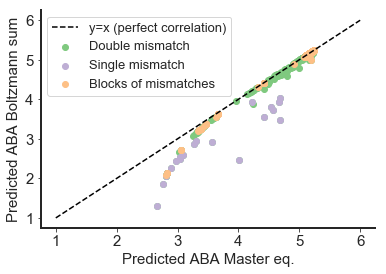

In [72]:
plt.scatter(ABAnorm,ABAeq,label='Double mismatch')
plt.scatter(normalSingle+2.5545002878227865,ABA_simple,label='Single mismatch')
plt.scatter(blocks_normal,blocks_eq,label='Blocks of mismatches')
#+2.5545002878227865   OR +1.2599085983218907
x = np.linspace(1,6,1000);
plt.plot(x,x, linestyle='dashed', color='black', label='y=x (perfect correlation)')
plt.legend(fontsize=13, frameon=True, loc='upper left')
plt.xlabel('Predicted ABA Master eq.',fontsize=15);
plt.ylabel('Predicted ABA Boltzmann sum',fontsize=15);
plt.xticks(fontsize=15);
plt.yticks(fontsize=15);
sns.despine();



# check the Pbound for different fits

In [26]:
simset3

array(['../Diewertje/2_5_2019_var_rates_conc3/fit_2_5_2019_var_rates_conc3_sim_3.txt',
       '../Diewertje/2_5_2019_var_rates_conc3/fit_2_5_2019_var_rates_conc3_sim_6.txt',
       '../Diewertje/2_5_2019_var_rates_conc3/fit_2_5_2019_var_rates_conc3_sim_9.txt',
       '../Diewertje/2_5_2019_var_rates_conc3/fit_2_5_2019_var_rates_conc3_sim_10.txt',
       '../Diewertje/2_5_2019_var_rates_conc3/fit_2_5_2019_var_rates_conc3_sim_12.txt',
       '../Diewertje/2_5_2019_var_rates_conc3/fit_2_5_2019_var_rates_conc3_sim_16.txt',
       '../Diewertje/2_5_2019_var_rates_conc3/fit_2_5_2019_var_rates_conc3_sim_17.txt',
       '../Diewertje/2_5_2019_var_rates_conc3/fit_2_5_2019_var_rates_conc3_sim_22.txt',
       '../Diewertje/2_5_2019_var_rates_conc3/fit_2_5_2019_var_rates_conc3_sim_23.txt'],
      dtype='<U77')

In [47]:
Param3=getParm.load_simm_anneal('../Diewertje/2_5_2019_var_rates_conc3/fit_2_5_2019_var_rates_conc3_sim_3.txt',Nparams)
Param23=getParm.load_simm_anneal('../Diewertje/2_5_2019_var_rates_conc3/fit_2_5_2019_var_rates_conc3_sim_23.txt',Nparams)
Param22=getParm.load_simm_anneal('../Diewertje/2_5_2019_var_rates_conc3/fit_2_5_2019_var_rates_conc3_sim_22.txt',Nparams)

15.889398777007274
[0.00424861 0.01268553 0.04159184 0.11908815 0.33942062 0.68741106
 0.93455167 0.97927963]
15.651849887325154
[0.00429482 0.01282307 0.04203775 0.12032496 0.34258204 0.69221279
 0.93761849 0.98036519]
16.021699048451715
[0.00426085 0.01272125 0.0416996  0.1193227  0.33942533 0.6847658
 0.92899768 0.97677639]
16.021699048451715
[0.00426085 0.01272125 0.0416996  0.1193227  0.33942533 0.6847658
 0.92899768 0.97677639]


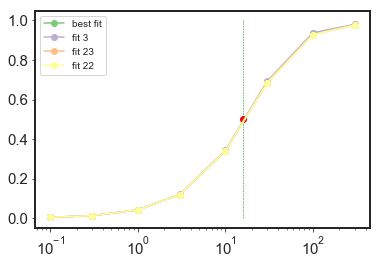

In [80]:
import Calculate_ABA_Finkelsteinlab_Diewertje as CalcABA
concentrations_f=np.array([0.1,0.3,1,3,10,30,100,300])
mmp=xdata[61]

Kd_1,Pbound_1,_=CalcABA.calc_Pbound(Param_conc3,concentrations_f,1,mmp,model_id)
plt.plot(concentrations_f,Pbound_1,marker='o',label='best fit')
print(Kd_1)
print(Pbound_1)

plt.scatter(Kd_1,0.5,color='red')
plt.plot(Kd_1*np.ones(10),np.linspace(0,1,10),linewidth=0.5,color='green',linestyle='--')

Kd_3,Pbound_3,_=CalcABA.calc_Pbound(Param3,concentrations_f,1,mmp,model_id)
plt.plot(concentrations_f,Pbound_3,marker='o',label='fit 3')
print(Kd_3)
print(Pbound_3)

Kd_23,Pbound_23,_=CalcABA.calc_Pbound(Param23,concentrations_f,1,mmp,model_id)
plt.plot(concentrations_f,Pbound_23,marker='o',label='fit 23')
print(Kd_23)
print(Pbound_23)

Kd_22,Pbound_22,_=CalcABA.calc_Pbound(Param22,concentrations_f,1,mmp,model_id)
plt.plot(concentrations_f,Pbound_22,marker='o',label='fit 22')
print(Kd_22)
print(Pbound_22)

# for sim in simset3:
#     Param22=getParm.load_simm_anneal(sim,Nparams)
#     Kd_22,Pbound_22,_=CalcABA.calc_Pbound(Param22,concentrations_f,1,mmp,model_id)
#     plt.plot(concentrations_f,Pbound_22,marker='o',label='fit 22')
#     print(Kd_22)
#     print(Pbound_22)

# print('the other way around')
# Pf=CalcABA.Hill_eq(concentrations_f,Kd_1)
# plt.scatter(concentrations_f,Pf,color='c')
# print(Pf)

# from scipy.optimize import curve_fit
# Kd_f,_ = curve_fit(CalcABA.Hill_eq, concentrations,Pf,maxfev=10000)
# print(Kd_f)

plt.xscale('log')
plt.legend()

In [71]:
import Calculate_ABA_Finkelsteinlab_Diewertje as CalcABA
concentrations_f=np.array([0.1,0.3,1,3,10,30,100,300])
diff=[]
for mp in xdata:
    Kd,Pbound,_=CalcABA.calc_Pbound(Param_conc3,concentrations_f,1,mp,model_id)
    Pf=CalcABA.Hill_eq(concentrations_f,Kd)
    diff.append(sum(abs(Pf-Pbound)))
diff
sum(diff)/len(diff)


# plt.plot(concentrations_f,Pf,color='c',marker='o',label='Fitted Hilcurve to same Kd')

# plt.scatter(Kd,0.5,color='red')
# plt.xscale('log')
# plt.legend()

0.03293874701157675

In [77]:
np.array(diff)[np.array(diff)==0.24694191669515625]

array([0.24694192])

In [79]:
np.where(np.array(diff)==0.24694191669515625)

(array([61], dtype=int64),)

15.889398777007274


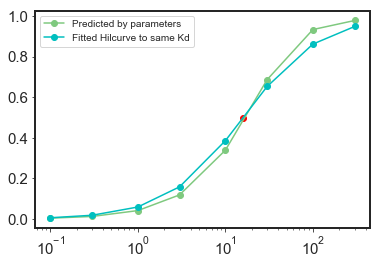

In [83]:
import Calculate_ABA_Finkelsteinlab_Diewertje as CalcABA
concentrations_f=np.array([0.1,0.3,1,3,10,30,100,300])
Kd,Pbound,_=CalcABA.calc_Pbound(Param_conc3,concentrations_f,1,xdata[61],model_id)
print(Kd)
plt.plot(concentrations_f,Pbound,marker='o',label='Predicted by parameters')
# plt.plot(Kd*np.ones(10),np.linspace(0,1,10),linewidth=0.5,color='green',linestyle='--',label='$K_d$=3.7025')
Pf=CalcABA.Hill_eq(concentrations_f,Kd)
plt.plot(concentrations_f,Pf,color='c',marker='o',label='Fitted Hilcurve to same Kd')

plt.scatter(Kd,0.5,color='red')
plt.xscale('log')
plt.legend()

In [113]:
#diff

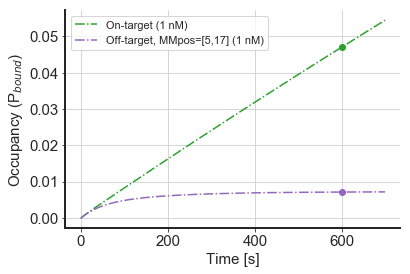

In [26]:
initial_condition=np.array([1.0] + [0.0] * (guide_length + 1))
rate_matrix_ot=CalcABA.get_master_equation(Param_conc3,[],model_id,20)
rate_matrix_of=CalcABA.get_master_equation(Param_conc3,[5,17],model_id,20)
# concentration=[30]#[0.1,0.3,1,3,10,30,100,300]

# Pot=[]
# Pof=[]
# for t in range(0,700):
#     for c in concentration:
#         new_rate_matrix = rate_matrix_ot.copy()
#         new_rate_matrix[0][0] *= c
#         new_rate_matrix[1][0] *= c
#         Probability = CalcABA.get_Probability(new_rate_matrix, initial_condition, t)
#         Pot.append(np.sum(Probability[1:]))
        
#         new_rate_matrix = rate_matrix_of.copy()
#         new_rate_matrix[0][0] *= c
#         new_rate_matrix[1][0] *= c
#         Probability = CalcABA.get_Probability(new_rate_matrix, initial_condition, t)
#         Pof.append(np.sum(Probability[1:]))

# Pot[1:]=Pot[1:]-Pot[1]
# Pof[1:]=Pof[1:]-Pof[1]
# plt.plot(range(0,700),Pot,label='On-target (30 nM)')
# plt.plot(range(0,700),Pof,label='Off-target, MMpos=[5,17] (30 nM)')
# plt.scatter(600,Pot[600])
# plt.scatter(600,Pof[600])
#######
# concentration=[100]#[0.1,0.3,1,3,10,30,100,300]
# Pot=[]
# Pof=[]
# for t in range(0,700):
#     for c in concentration:
#         new_rate_matrix = rate_matrix_ot.copy()
#         new_rate_matrix[0][0] *= c
#         new_rate_matrix[1][0] *= c
#         Probability = CalcABA.get_Probability(new_rate_matrix, initial_condition, t)
#         Pot.append(np.sum(Probability[1:]))
        
#         new_rate_matrix = rate_matrix_of.copy()
#         new_rate_matrix[0][0] *= c
#         new_rate_matrix[1][0] *= c
#         Probability = CalcABA.get_Probability(new_rate_matrix, initial_condition, t)
#         Pof.append(np.sum(Probability[1:]))

# Pot[1:]=Pot[1:]-Pot[1]
# Pof[1:]=Pof[1:]-Pof[1]
# plt.plot(range(0,700),Pot,label='On-target (100 nM)',linestyle=':',color=current_colors[2])
# plt.plot(range(0,700),Pof,label='Off-target, MMpos=[5,17] (100 nM)',linestyle=':',color=current_colors[4])
# plt.scatter(600,Pot[600],color=current_colors[2])
# plt.scatter(600,Pof[600],color=current_colors[4])
#####
concentration=[1]#[0.1,0.3,1,3,10,30,100,300]
Pot=[]
Pof=[]
for t in range(0,700):
    for c in concentration:
        new_rate_matrix = rate_matrix_ot.copy()
        new_rate_matrix[0][0] *= c
        new_rate_matrix[1][0] *= c
        Probability = CalcABA.get_Probability(new_rate_matrix, initial_condition, t)
        Pot.append(np.sum(Probability[1:]))
        
        new_rate_matrix = rate_matrix_of.copy()
        new_rate_matrix[0][0] *= c
        new_rate_matrix[1][0] *= c
        Probability = CalcABA.get_Probability(new_rate_matrix, initial_condition, t)
        Pof.append(np.sum(Probability[1:]))

Pot[1:]=Pot[1:]-Pot[1]
Pof[1:]=Pof[1:]-Pof[1]
plt.plot(range(0,700),Pot,label='On-target (1 nM)',linestyle='-.',color=current_colors[2])
plt.plot(range(0,700),Pof,label='Off-target, MMpos=[5,17] (1 nM)',linestyle='-.',color=current_colors[4])
plt.scatter(600,Pot[600],color=current_colors[2])
plt.scatter(600,Pof[600],color=current_colors[4])
###
plt.legend(fontsize=11)
plt.xlabel('Time [s]',fontsize=15)
plt.ylabel('Occupancy (P$_{bound}$)',fontsize=15)
plt.grid()
sns.despine()

In [136]:
Pot

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.026512679402293148,
 0.07562320718560923,
 0.21478000816256113,
 0.45149904353660114,
 0.7332898150806738,
 0.8919680842132176,
 0.964954487541787,
 0.9880403986431705,
 0.027026740596393657,
 0.07694279990681525,
 0.217574314025012,
 0.45514119085638943,
 0.7360667294434156,
 0.8933210761696304,
 0.9654272052616121,
 0.9882053585988898,
 0.02736903773910561,
 0.07786589584396333,
 0.21978089060825784,
 0.45835009056433934,
 0.7385813758261339,
 0.8945558013058229,
 0.9658599166350923,
 0.9883564940772935,
 0.0277018036302618,
 0.07876441937129475,
 0.22193347424733945,
 0.46148482914297123,
 0.7410379482845033,
 0.8957614300044431,
 0.9662822988203944,
 0.9885040057609444,
 0.02803307457267649,
 0.07965853094400542,
 0.22407276250787603,
 0.4645928016004029,
 0.7434660564066173,
 0.8969509236525871,
 0.9666986729932663,
 0.9886493797483731,
 0.028363985069143186,
 0.08055113595048403,
 0.22620481274676402,
 0.46768119103363187,
 0.745

In [24]:
epsilon = Param_conc3[:-2]
energies=CalcABA.get_energies(epsilon,np.arange(1,21).tolist(),20)
print(np.cumsum(energies))
print(np.exp(-np.cumsum(energies)))
print(sum(np.exp(-np.cumsum(energies))))
mABA=-np.log(np.sum(np.exp(-np.cumsum(energies))))
mABA

[ 5.23743862 13.40539942 19.67598639 20.85108942 25.6394881  30.03838956
 33.21532967 41.17584102 43.06472593 48.18526372 45.34800715 47.92349532
 51.91539479 55.82829468 64.20075852 60.9044899  63.69569962 74.79734107
 83.69046055 85.46226546 81.49504636]
[5.31385024e-03 1.50698527e-06 2.84988730e-09 8.80008614e-10
 7.32675721e-12 9.00519594e-14 3.75634618e-15 1.31086949e-18
 1.98256376e-19 1.18414765e-21 2.02120669e-20 1.53847495e-21
 2.84073365e-23 5.67648752e-25 1.31209367e-28 3.54418278e-27
 2.17424828e-28 3.28040535e-33 4.50499999e-37 7.65966368e-38
 4.04716642e-36]
0.005315360958235245


5.2371543563737575

In [26]:
epsilon = Param_conc3[:-2]
energies=CalcABA.get_energies(epsilon,np.arange(3,21).tolist(),20)
print(np.cumsum(energies))
print(np.exp(-np.cumsum(energies)))
print(sum(np.exp(-np.cumsum(energies))))
mABA=-np.log(np.sum(np.exp(-np.cumsum(energies))))
mABA

[ 5.23743862  9.41896774 12.82703004 14.00213307 18.79053175 23.18943322
 26.36637332 34.32688467 36.21576959 41.33630737 38.49905081 41.07453897
 45.06643844 48.97933833 57.35180217 54.05553356 56.84674327 67.94838473
 76.84150421 78.61330911 74.64609001]
[5.31385024e-03 8.11697641e-05 2.68714829e-06 8.29756898e-07
 6.90837253e-09 8.49096626e-11 3.54184505e-12 1.23601404e-15
 1.86935210e-16 1.11652848e-18 1.90578839e-17 1.45062240e-18
 2.67851735e-20 5.35233929e-22 1.23716832e-25 3.34179696e-24
 2.05009074e-25 3.09308218e-30 4.24774798e-34 7.22226882e-35
 3.81605839e-33]
0.005398543901763684


5.221626009594959

In [31]:
np.log(10)+1.3

3.6025850929940457